# <span style="color:royalblue"> [4주차] 부동산 수요와 공급</span>
# 인허가, 분양 물량 데이터 습득 및 분석 
## feat. 함수와 모듈 만들기 & KOSIS API 활용하기

--- 

<div style="text-align: right"> Final Edition : 2023.1.25<br>
    copyrightⓒ 2024 All rights reserved by Data Lover Pablo </div>

# Part_I. 미시경제의 수요-공급 곡선

지난시간까지는 부동산 가격에 영향을 주는 거시경제(Macro)에 대해 공부했습니다.  
부동산 뿐만 아니라 재화의 가격은 수요와 공급의 법칙이 작용합니다. 

[부동산 수요와 공급에 대한 뉴스기사 - 이론만 참고](https://www.joongang.co.kr/article/23818710#home)

# 부동산의 수요와 공급
부동산에서 공급과 수요에 관한 지표는 다음의 4가지로 알아볼 수가 있습니다. 
* 공급 : 인허가 및 분양 물량, 착공물량, 준공물량
* 수요 : 매매가와 전세가 가격지수(투자 및 실입주 수요 포함), (and 미분양)

##  공동주택의 공급 프로세스  
인허가 > 분양 > 건설 > 준공 > 입주 순으로 진행됩니다. <br>
인허가부터 입주까지 하나의 Cycle 에 걸리는 기간은 약 2~3년 정도입니다.<br>

** 인허가와 분양/미분양 데이터를 분석하면 2~3년 후의 공급측면에서의 부동산 가격을 예측할 수 있습니다. **

## 주택공급 데이터 수집

* 소스 : 국토교통 통계누리 > 주택 > 부문별 주택 건설실적 인허가 통계
* 기간 : 2007년 1월 ~ 2023년 5월
* 필터 : 행(row) : 월(Month) / 열(Column) : 권역별2
* 다운로드 : 마우스 오른쪽버튼 > 내리기
* 링크 주소 : [클릭](https://stat.molit.go.kr/portal/cate/statView.do?hRsId=31&hFormId=1952&hSelectId=1952&hPoint=00&hAppr=1&hDivEng=&oFileName=&rFileName=&midpath=&month_yn=N&sFormId=1952&sStart=200701&sEnd=202206&sStyleNum=1&EXPORT=)
* 국토부 통계누리 사이트는 서비스가 불안정할때는 KOSIS로 대체합니다
[KOSIS](https://kosis.kr/statHtml/statHtml.do?orgId=116&tblId=DT_MLTM_1952)
[주택유형별인허가실적](https://kosis.kr/statHtml/statHtml.do?orgId=116&tblId=DT_MLTM_1952)

In [78]:
import pandas as pd

path = r'./data/주택규모별_주택건설_인허가실적_월별_누계__20240125233401.csv'
inherga = pd.read_csv(path, encoding='cp949', skiprows=[0,1,3])


In [79]:
inherga

,시점,전국,서울,인천,경기,부산,대구
0,2007.01,12038,1530,69,2647,455,818
1,2007.02,29789,2324,185,5517,1554,3549
2,2007.03,49827,4212,1115,8705,3675,4596
3,2007.04,69013,6175,4452,12692,4039,5110
4,2007.05,99606,8041,4663,25860,4936,5685
...,...,...,...,...,...,...,...
198,2023.07,207278,18536,11432,48921,14181,8390
199,2023.08,212757,19370,11560,50621,14489,8440
200,2023.09,255871,19778,15284,67033,16930,8455
201,2023.10,273918,21849,16139,70232,18685,8475


In [80]:
inherga['수도권'] = inherga['서울'] + inherga['인천'] + inherga['경기']

In [81]:
inherga['지방소계'] = inherga['전국'] - inherga['수도권']

In [83]:
inherga

,시점,전국,서울,인천,경기,부산,대구,수도권,지방소계
0,2007.01,12038,1530,69,2647,455,818,4246,7792
1,2007.02,29789,2324,185,5517,1554,3549,8026,21763
2,2007.03,49827,4212,1115,8705,3675,4596,14032,35795
3,2007.04,69013,6175,4452,12692,4039,5110,23319,45694
4,2007.05,99606,8041,4663,25860,4936,5685,38564,61042
...,...,...,...,...,...,...,...,...,...
198,2023.07,207278,18536,11432,48921,14181,8390,78889,128389
199,2023.08,212757,19370,11560,50621,14489,8440,81551,131206
200,2023.09,255871,19778,15284,67033,16930,8455,102095,153776
201,2023.10,273918,21849,16139,70232,18685,8475,108220,165698


In [84]:
# 누적막대 그래프 그리기

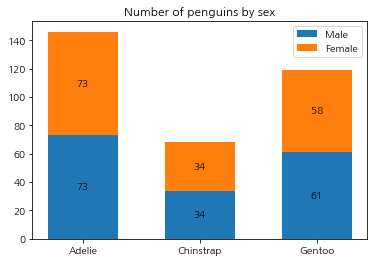

In [85]:
import matplotlib.pyplot as plt
import numpy as np

species = ('Adelie', 'Chinstrap', 'Gentoo')
sex_counts = {
    'Male': np.array([73, 34, 61]),
    'Female': np.array([73, 34, 58]),
}
width = 0.6  # the width of the bars: can also be len(x) sequence


fig, ax = plt.subplots()
bottom = np.zeros(3)

for sex, sex_count in sex_counts.items():
    p = ax.bar(species, sex_count, width, label=sex, bottom=bottom)
    bottom += sex_count

    ax.bar_label(p, label_type='center')

ax.set_title('Number of penguins by sex')
ax.legend()

plt.show()

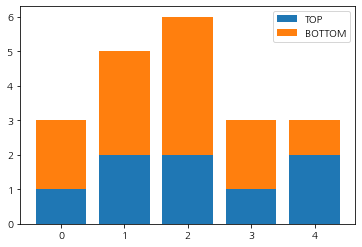

In [86]:
from matplotlib import pyplot as plt

down = [1, 2, 2, 1, 2]
top = [2, 3, 4, 2, 1]

plt.bar(range(len(down)), down) 
plt.bar(range(len(top)), top, bottom=down)
# plt.plot(range(len(top)), top, color='r')

plt.legend(['TOP', 'BOTTOM'])
plt.show()

## [draft] 인허가 실적 누적막대그래프

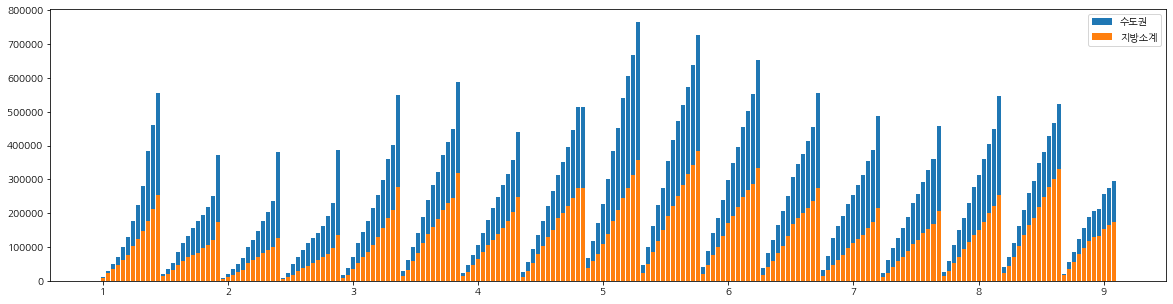

In [87]:
import warnings
warnings.filterwarnings("ignore")

from matplotlib import pyplot as plt
import matplotlib.font_manager as fm

plt.figure(figsize=(20,5))

import matplotlib.font_manager as fm
path = 'C:\\Windows\\Fonts\\NanumGothic.ttf'
font_name = fm.FontProperties(fname=path).get_name()
plt.rc('font', family=font_name)

top =  inherga.loc[:,"수도권"]
down =  inherga.loc[:,"지방소계"]

plt.bar(range(len(top)), top, bottom=down)
plt.bar(range(len(down)), down) 

ax = plt.subplot()
# ax.bar(value_a_x, value_a)
ax.set_xticklabels(inherga.index)

plt.legend(['수도권', '지방소계'])
plt.show()

 - [ ]   x축 설정이 되어있지 않고, 
 - [ ]   연도별 집계가 필요해보입니다.

In [88]:
# 이제는 3주차에 배운 API를 모든 데이터 포털에서 활용해보기로 합니다.

# 1. KOSIS 국가통계포털 OPEN API

[KOSIS 국가통계포털 OPEN API 서비스](https://kosis.kr/openapi/index/index.jsp)

<img src="./data/KOSIS.PNG" alt="Drawing" style="width: 1000px;"/>

## 2. 샘플 API 해보기(JSON -> 그래프)

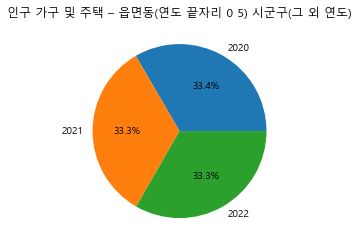

In [89]:
import json
from urllib.request import urlopen
import matplotlib.pyplot as plt

# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

#url을 통해 json 데이터 가져오기
with urlopen("https://kosis.kr/openapi/statisticsData.do?method=getList&apiKey=
             &format=json&jsonVD=Y&userStatsId=openapisample/101/DT_1IN1502/2/1/20191106094026_1&prdSe=Y&newEstPrdCnt=3") as url:
    json_file = url.read()
    
py_json = json.loads(json_file.decode('utf-8'))

#변수 지정 및 데이터 저장
labels = [] #  시점  [ 2019, 2020,,]
ratio = [] # 값 [5555, 66666,]
title = ''

for i, v in enumerate(py_json):
    labels.append(v['PRD_DE']) #년도 데이터
    ratio.append(v['DT']) #값/비율 데이터
    if i == 0 :
        title = v['TBL_NM'] #차트제목
        
#Pie차트 그리기
plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.title(title)
plt.show()


In [90]:
labels

['2020', '2021', '2022']

In [91]:
ratio

['51829136', '51738071', '51692272']

In [92]:
py_json

[{'TBL_NM': '인구 가구 및 주택 – 읍면동(연도 끝자리 0 5) 시군구(그 외 연도)',
  'PRD_DE': '2020',
  'TBL_ID': 'DT_1IN1502',
  'ITM_NM': '총인구',
  'ITM_NM_ENG': 'Total population',
  'ITM_ID': 'T100',
  'UNIT_NM': '명',
  'ORG_ID': '101',
  'UNIT_NM_ENG': 'Person',
  'C1_OBJ_NM': '행정구역별(읍면동)',
  'C1_OBJ_NM_ENG': 'By administrative divisions(eup myeon dong)',
  'DT': '51829136',
  'PRD_SE': 'A',
  'C1': '00',
  'C1_NM': '전국',
  'C1_NM_ENG': 'Whole country'},
 {'TBL_NM': '인구 가구 및 주택 – 읍면동(연도 끝자리 0 5) 시군구(그 외 연도)',
  'PRD_DE': '2021',
  'TBL_ID': 'DT_1IN1502',
  'ITM_NM': '총인구',
  'ITM_NM_ENG': 'Total population',
  'ITM_ID': 'T100',
  'UNIT_NM': '명',
  'ORG_ID': '101',
  'UNIT_NM_ENG': 'Person',
  'C1_OBJ_NM': '행정구역별(읍면동)',
  'C1_OBJ_NM_ENG': 'By administrative divisions(eup myeon dong)',
  'DT': '51738071',
  'PRD_SE': 'A',
  'C1': '00',
  'C1_NM': '전국',
  'C1_NM_ENG': 'Whole country'},
 {'TBL_NM': '인구 가구 및 주택 – 읍면동(연도 끝자리 0 5) 시군구(그 외 연도)',
  'PRD_DE': '2022',
  'TBL_ID': 'DT_1IN1502',
  'ITM_NM': '총인구',
  'IT

## 3. 샘플 API 해보기(JSON -> 표)

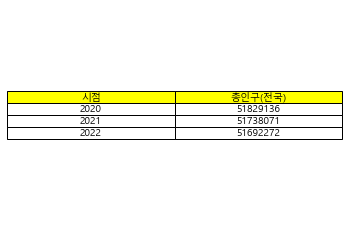

In [93]:
import json
from urllib.request import urlopen # python 3.x 버전에서 사용 (2.x 버전이라면 from urllib import urlopen)
import matplotlib.pyplot as plt


# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)


#url을 통해 json 데이터 가져오기
with urlopen("https://kosis.kr/openapi/statisticsData.do?method=getList&apiKey=
             &format=json&jsonVD=Y&userStatsId=openapisample/101/DT_1IN1502/2/1/20191106094026_1&prdSe=Y&newEstPrdCnt=3") as url:
    json_file = url.read()
    
py_json = json.loads(json_file.decode('utf-8'))


#변수 지정 및 데이터 저장
data = []
for i, v in enumerate(py_json):
    value = []
    value.append(v['PRD_DE'])
    value.append(v['DT'])
    
    data.append(value)
    
    
#Table 만들기
fig, ax = plt.subplots(1,1)
column_labels=["시점", "총인구(전국)"]
ax.axis('tight')
ax.axis('off')
ax.table(cellText=data,colLabels=column_labels,colColours =["yellow"] * 2, loc="center", cellLoc='center')
plt.show()

## 4. 통계자료 URL 생성하기

[URL 생성 페이지](https://kosis.kr/openapi/devGuide/devGuide_0203List.jsp)

<img src="./data/URL.PNG" alt="Drawing" style="width: 1000px;"/>

## 5. 원하는 통계코드에 따라 URL 생성하기

In [20]:
# url="....."
# apikey=''
# payload = "..."

In [21]:
# from pandas.io.json import json_normalize
from pandas import json_normalize
import pandas as pd
import requests

# url 생성
json_Url = 'https://kosis.kr/openapi/Param/statisticsParameterData.do?method=getList&apiKey=
&itmId=13103871090T1+&objL1=ALL&objL2=13102871090B.0001+&objL3=13102871090C.0001+&objL4=13102871090D.0001+&objL5=&objL6=&objL7=&objL8=&format=json&jsonVD=Y&prdSe=M&startPrdDe=200701&endPrdDe=202305&orgId=116&tblId=DT_MLTM_1948'

# 데이터 요청
contents = requests.get(json_Url)

# JSON데이터 가져오기
test_data = contents.json()

# Pandas DataFrame 변환
df = pd.json_normalize(test_data)

# 출력
df

,TBL_NM,ITM_NM_ENG,ITM_ID,ORG_ID,UNIT_NM_ENG,C1_OBJ_NM,C2_OBJ_NM,C3_OBJ_NM,C4,C4_OBJ_NM,...,C3_OBJ_NM_ENG,DT,C3,C4_OBJ_NM_ENG,PRD_SE,C1,C1_NM,C2_NM,C3_NM,C4_NM
0,주택유형별 주택건설 인허가실적(월별 누계),Construction permits,13103871090T1,116,Apartment Unit,시도명,대분류,중분류,13102871090D.0001,소분류,...,Middle Classification,12038,13102871090C.0001,Small Classification,M,13102871090A.0001,전국,합계(동수기준),합계(동수기준),합계(동수기준)
1,주택유형별 주택건설 인허가실적(월별 누계),Construction permits,13103871090T1,116,Apartment Unit,시도명,대분류,중분류,13102871090D.0001,소분류,...,Middle Classification,29789,13102871090C.0001,Small Classification,M,13102871090A.0001,전국,합계(동수기준),합계(동수기준),합계(동수기준)
2,주택유형별 주택건설 인허가실적(월별 누계),Construction permits,13103871090T1,116,Apartment Unit,시도명,대분류,중분류,13102871090D.0001,소분류,...,Middle Classification,49827,13102871090C.0001,Small Classification,M,13102871090A.0001,전국,합계(동수기준),합계(동수기준),합계(동수기준)
3,주택유형별 주택건설 인허가실적(월별 누계),Construction permits,13103871090T1,116,Apartment Unit,시도명,대분류,중분류,13102871090D.0001,소분류,...,Middle Classification,69013,13102871090C.0001,Small Classification,M,13102871090A.0001,전국,합계(동수기준),합계(동수기준),합계(동수기준)
4,주택유형별 주택건설 인허가실적(월별 누계),Construction permits,13103871090T1,116,Apartment Unit,시도명,대분류,중분류,13102871090D.0001,소분류,...,Middle Classification,99606,13102871090C.0001,Small Classification,M,13102871090A.0001,전국,합계(동수기준),합계(동수기준),합계(동수기준)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4263,주택유형별 주택건설 인허가실적(월별 누계),Construction permits,13103871090T1,116,Apartment Unit,시도명,대분류,중분류,13102871090D.0001,소분류,...,Middle Classification,20,13102871090C.0001,Small Classification,M,13102871090A.0022,세종,합계(동수기준),합계(동수기준),합계(동수기준)
4264,주택유형별 주택건설 인허가실적(월별 누계),Construction permits,13103871090T1,116,Apartment Unit,시도명,대분류,중분류,13102871090D.0001,소분류,...,Middle Classification,47,13102871090C.0001,Small Classification,M,13102871090A.0022,세종,합계(동수기준),합계(동수기준),합계(동수기준)
4265,주택유형별 주택건설 인허가실적(월별 누계),Construction permits,13103871090T1,116,Apartment Unit,시도명,대분류,중분류,13102871090D.0001,소분류,...,Middle Classification,64,13102871090C.0001,Small Classification,M,13102871090A.0022,세종,합계(동수기준),합계(동수기준),합계(동수기준)
4266,주택유형별 주택건설 인허가실적(월별 누계),Construction permits,13103871090T1,116,Apartment Unit,시도명,대분류,중분류,13102871090D.0001,소분류,...,Middle Classification,74,13102871090C.0001,Small Classification,M,13102871090A.0022,세종,합계(동수기준),합계(동수기준),합계(동수기준)


In [22]:
# 하루 4만건 호출 가능. 원본 데이터 저장
raw = df

In [23]:
df = df[['PRD_DE', 'C1_NM', 'DT']]
df

,PRD_DE,C1_NM,DT
0,200701,전국,12038
1,200702,전국,29789
2,200703,전국,49827
3,200704,전국,69013
4,200705,전국,99606
...,...,...,...
4263,202301,세종,20
4264,202302,세종,47
4265,202303,세종,64
4266,202304,세종,74


In [24]:
# df.melt(id_vars='', )

In [25]:
# df = df.pivot("PRD_DE", "C1_NM", "DT")
df = df.pivot(index="PRD_DE", columns= "C1_NM", values="DT")

df

C1_NM,강원,경기,경남,경북,광주,기타광역시,기타지방,대구,대전,부산,...,수도권,울산,인천,전국,전남,전북,제주,지방소계,충남,충북
PRD_DE,,,,,,,,,,,,,,,,,,,,,
200701,452,2647,1691,698,1022,2533,5259,818,55,455,...,4246,183,69,12038,206,888,132,7792,1004,188
200702,642,5517,4206,2942,2200,8748,13015,3549,89,1554,...,8026,1356,185,29789,700,1490,232,21763,2310,493
200703,1031,8705,6527,5256,3547,14013,21782,4596,154,3675,...,14032,2041,1115,49827,1091,2153,337,35795,4200,1187
200704,2185,12692,7576,6480,3773,17479,28215,5110,235,4039,...,23319,4322,4452,69013,2310,2627,485,45694,4901,1651
200705,2698,25860,12754,7330,5844,21777,39265,5685,746,4936,...,38564,4566,4663,99606,2663,2938,563,61042,7988,2331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202301,2041,2992,153,1178,829,5797,10369,1793,714,1499,...,5259,962,441,21425,153,2962,226,16166,3529,107
202302,2336,10289,1090,5128,906,13409,21469,1818,2769,5751,...,19497,2165,625,54375,1473,4243,715,34878,5662,775
202303,4610,16509,2347,6896,1832,20989,35202,1924,6335,7097,...,30253,3801,846,86444,1702,5326,1252,56191,10461,2544


In [26]:
df= df[['전국', '수도권', '지방소계']]

In [27]:
df.head(13)

C1_NM,전국,수도권,지방소계
PRD_DE,,,
200701,12038,4246,7792
200702,29789,8026,21763
200703,49827,14032,35795
200704,69013,23319,45694
200705,99606,38564,61042
200706,130436,52877,77559
200707,176284,72386,103898
200708,224745,100676,124069
200709,280490,134291,146199


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 197 entries, 200701 to 202305
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   전국      197 non-null    object
 1   수도권     197 non-null    object
 2   지방소계    197 non-null    object
dtypes: object(3)
memory usage: 6.2+ KB


In [29]:
df.index.str[-2:] == '01'

array([ True, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False,

In [30]:
df.index

Index(['200701', '200702', '200703', '200704', '200705', '200706', '200707',
       '200708', '200709', '200710',
       ...
       '202208', '202209', '202210', '202211', '202212', '202301', '202302',
       '202303', '202304', '202305'],
      dtype='object', name='PRD_DE', length=197)

In [31]:
df = df.copy()
df['수도권'] = pd.to_numeric(df['수도권'])
df['지방소계'] = pd.to_numeric(df['지방소계'])

[numpy.where 다규멘트](https://numpy.org/doc/stable/reference/generated/numpy.where.html)  
[pd.diff 다규멘트](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.diff.html)

In [32]:
import numpy as np

df['수도권_월'] = np.where(df.index.str[-2:] == '01', df['수도권'], df['수도권'].diff()).astype(int)
df['지방권_월'] = np.where(df.index.str[-2:] == '01', df['지방소계'], df['지방소계'].diff()).astype(int)

In [33]:
# df = df.copy()
df['연'] = df.index.str[:4]
df['월'] = df.index.str[-2:]

df.index = df['연'] + "-" + df['월']
df.index = pd.to_datetime(df.index)

In [34]:
df

C1_NM,전국,수도권,지방소계,수도권_월,지방권_월,연,월
2007-01-01,12038,4246,7792,4246,7792,2007,01
2007-02-01,29789,8026,21763,3780,13971,2007,02
2007-03-01,49827,14032,35795,6006,14032,2007,03
2007-04-01,69013,23319,45694,9287,9899,2007,04
2007-05-01,99606,38564,61042,15245,15348,2007,05
...,...,...,...,...,...,...,...
2023-01-01,21425,5259,16166,5259,16166,2023,01
2023-02-01,54375,19497,34878,14238,18712,2023,02
2023-03-01,86444,30253,56191,10756,21313,2023,03
2023-04-01,123371,44566,78805,14313,22614,2023,04


In [35]:
df_per = df[['수도권_월','지방권_월']]

In [36]:
df_per

C1_NM,수도권_월,지방권_월
2007-01-01,4246,7792
2007-02-01,3780,13971
2007-03-01,6006,14032
2007-04-01,9287,9899
2007-05-01,15245,15348
...,...,...
2023-01-01,5259,16166
2023-02-01,14238,18712
2023-03-01,10756,21313
2023-04-01,14313,22614


In [37]:
year_per = df_per.groupby(df_per.index.year).sum()

In [38]:
year_per

C1_NM,수도권_월,지방권_월
2007,302551,253241
2008,197580,173705
2009,255158,126629
2010,250218,136324
2011,272156,277438
2012,269290,317594
2013,192610,247506
2014,241889,273362
2015,408773,356555
2016,341162,384886


In [39]:
year_per = year_per.drop(index=[2007,2008,2009,2010], axis=0)

[지역별 주택건설 인허가 실적(비누계 연)데이터 확인](https://kosis.kr/statHtml/statHtml.do?orgId=116&tblId=DT_MLTM_666&vw_cd=MT_ZTITLE&list_id=116_11626_001&scrId=&seqNo=&lang_mode=ko&obj_var_id=&itm_id=&conn_path=MT_ZTITLE&path=%252FstatisticsList%252FstatisticsListIndex.do)

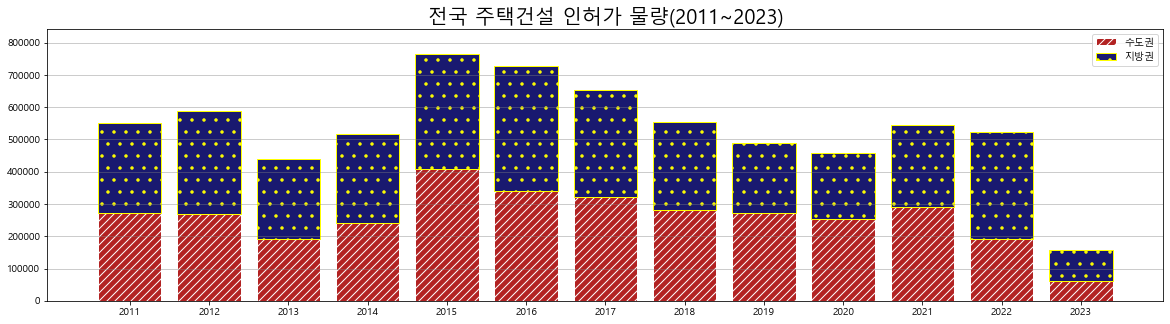

In [40]:
from matplotlib import pyplot as plt
import matplotlib.font_manager as fm
import numpy as np

plt.figure(figsize=(20,5))

# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

down =  year_per.loc[:,'수도권_월']# 수도권
top =  year_per.loc[:,'지방권_월'] # 지방권

plt.bar(year_per.index, down, color='firebrick',hatch="///",edgecolor='white')#수도권
plt.bar(year_per.index, top, bottom=down, color='midnightblue', hatch=".",edgecolor='yellow') #지방권

y = down + top

import matplotlib.ticker as mticker

# plt.xlim(X.min()*1.1, X.max()*1.1)
plt.ylim(0, y.max()*1.1)
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%i')) #%i 는 int , %f 는 float, %.3f 백만호 : 0.001 백만호
plt.grid(True, axis='y', color='gray', alpha=0.5, linestyle='-')

plt.legend(['수도권', '지방권'])
plt.title('전국 주택건설 인허가 물량(2011~2023)', fontsize='20')
plt.xticks(year_per.index)
plt.show()

# 2 전국 <span style="color:red">분양 물량(호)</span> data 분석

### * 데이터 수집
  - 정의 : 전국 민간분양아파트의 지역별 분양시장 동향 제공을 통해 국민의 주택구매 의사결정을 지원하고 부동산 경기 예측 및 아파트 공급정책 수립을 위한 정보 제공
  - 데이터체계 : 주택사업자→ 주택도시보증공사(HUG) 지사→ 주택도시보증공사(HUG) 주택도시금융연구원
  - 소스 : KOSIS>주거>민간아파트분양시장동향>지역별 신규 분양세대수 
  - URL : [지역별 신규 분양 세대수](https://kosis.kr/statHtml/statHtml.do?orgId=414&tblId=DT_41401N_007)
  - 기간 : 2015년 1월 ~ 현재
  - 필터 : 항목(신규 분양세대수), 지역별(1레벨 전체선택, 2레벨 해제), 시점(2015.1 ~ 현재)
  - 다운로드 : 통계조회>행렬전환>다운로드> [xlsx]

In [94]:
# from pandas.io.json import json_normalize
from pandas import json_normalize

import pandas as pd
import requests

# url 생성
json_Url = 'https://kosis.kr/openapi/Param/statisticsParameterData.do?method=getList&apiKey=
&itmId=T1+&objL1=00+04+11+20+&objL2=&objL3=&objL4=&objL5=&objL6=&objL7=&objL8=&format=json&jsonVD=Y&prdSe=M&startPrdDe=201510&endPrdDe=202312&orgId=414&tblId=DT_41401N_007'

# 데이터 요청
contents = requests.get(json_Url)

# JSON데이터 가져오기
test_data =contents.json()

# Pandas DataFrame 변환
df = pd.json_normalize(test_data)

# 출력
df

,TBL_NM,PRD_DE,TBL_ID,ITM_NM,ITM_ID,ORG_ID,UNIT_NM,UNIT_NM_ENG,C1_OBJ_NM,DT,PRD_SE,C1,C1_NM
0,지역별 신규 분양세대수,201510,DT_41401N_007,신규 분양세대수,T1,414,세대,Households,지역별,65881,M,00,전국
1,지역별 신규 분양세대수,201511,DT_41401N_007,신규 분양세대수,T1,414,세대,Households,지역별,51933,M,00,전국
2,지역별 신규 분양세대수,201512,DT_41401N_007,신규 분양세대수,T1,414,세대,Households,지역별,20738,M,00,전국
3,지역별 신규 분양세대수,201601,DT_41401N_007,신규 분양세대수,T1,414,세대,Households,지역별,11331,M,00,전국
4,지역별 신규 분양세대수,201602,DT_41401N_007,신규 분양세대수,T1,414,세대,Households,지역별,11887,M,00,전국
...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,지역별 신규 분양세대수,202307,DT_41401N_007,신규 분양세대수,T1,414,세대,Households,지역별,3154,M,20,기타지방
388,지역별 신규 분양세대수,202308,DT_41401N_007,신규 분양세대수,T1,414,세대,Households,지역별,1605,M,20,기타지방
389,지역별 신규 분양세대수,202309,DT_41401N_007,신규 분양세대수,T1,414,세대,Households,지역별,5221,M,20,기타지방
390,지역별 신규 분양세대수,202310,DT_41401N_007,신규 분양세대수,T1,414,세대,Households,지역별,4452,M,20,기타지방


In [95]:
raw_sales = df

In [96]:
df = raw_sales

In [97]:
df = df[['PRD_DE', 'C1_NM', 'DT']]
df

,PRD_DE,C1_NM,DT
0,201510,전국,65881
1,201511,전국,51933
2,201512,전국,20738
3,201601,전국,11331
4,201602,전국,11887
...,...,...,...
387,202307,기타지방,3154
388,202308,기타지방,1605
389,202309,기타지방,5221
390,202310,기타지방,4452


In [98]:
# df = df.pivot("PRD_DE", "C1_NM", "DT")
df = df.pivot(index="PRD_DE", columns= "C1_NM", values="DT")

df

C1_NM,5대광역시 및 세종특별자치시,기타지방,수도권,전국
PRD_DE,,,,
201510,7766,23095,35020,65881
201511,8773,16753,26407,51933
201512,3522,10656,6560,20738
201601,816,10033,482,11331
201602,1171,7796,2920,11887
...,...,...,...,...
202307,2041,3154,3292,8487
202308,1168,1605,1945,4718
202309,1540,5221,2751,9512


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98 entries, 201510 to 202311
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   5대광역시 및 세종특별자치시  98 non-null     object
 1   기타지방             98 non-null     object
 2   수도권              98 non-null     object
 3   전국               98 non-null     object
dtypes: object(4)
memory usage: 3.8+ KB


In [100]:
df = df.astype(int)

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98 entries, 201510 to 202311
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   5대광역시 및 세종특별자치시  98 non-null     int32
 1   기타지방             98 non-null     int32
 2   수도권              98 non-null     int32
 3   전국               98 non-null     int32
dtypes: int32(4)
memory usage: 2.3+ KB


In [102]:
df['지방권'] = df['전국'] - df['수도권']

In [103]:
df_presale = df.loc[:,['수도권', '지방권']]
df_presale.head()

C1_NM,수도권,지방권
PRD_DE,,
201510,35020,30861
201511,26407,25526
201512,6560,14178
201601,482,10849
201602,2920,8967


###  2.6.3 행삭제
연도별 합계를 하기전에 2015년 3개 월의 행을 삭제합니다.

[pandas 공식 document](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)

In [104]:
df_presale.drop(['201510', '201511', '201512'], inplace=True)

In [105]:
# df = df.copy()
df_presale['연'] = df_presale.index.str[:4]
df_presale['월'] =df_presale.index.str[-2:]

df_presale['시점']= df_presale['연'] + "-" + df_presale['월']
df_presale.index = df_presale['시점']
df_presale.index = pd.to_datetime(df_presale.index)

In [106]:
df_presale['시점'] = pd.to_datetime(df_presale['시점'])

In [107]:
df_presale

C1_NM,수도권,지방권,연,월,시점
시점,,,,,
2016-01-01,482,10849,2016,01,2016-01-01
2016-02-01,2920,8967,2016,02,2016-02-01
2016-03-01,13043,11829,2016,03,2016-03-01
2016-04-01,9877,21200,2016,04,2016-04-01
2016-05-01,19015,19909,2016,05,2016-05-01
...,...,...,...,...,...
2023-07-01,3292,5195,2023,07,2023-07-01
2023-08-01,1945,2773,2023,08,2023-08-01
2023-09-01,2751,6761,2023,09,2023-09-01


In [108]:
df_presale = df_presale.groupby(['연']).sum(['수도권','지방권'])
df_presale

C1_NM,수도권,지방권
연,,
2016,145331,168269
2017,82603,99047
2018,78454,79030
2019,86097,86562
2020,112992,113094
2021,78848,139669
2022,71886,107587
2023,52307,54095


In [111]:
def presale_preprocessing(url):

    contents = requests.get(url)
    test_data =contents.json()
    df = pd.json_normalize(test_data)

    df = df[['PRD_DE', 'C1_NM', 'DT']]
    #     df = df.pivot("PRD_DE", "C1_NM", "DT")
    df = df.pivot(index="PRD_DE", columns= "C1_NM", values="DT")    
    df = df.astype(int)

    df['지방권'] = df['전국'] - df['수도권']
    df = df.loc[:,['수도권', '지방권']]
    df.drop(['201510', '201511', '201512'], inplace=True)

    df['연'] = df.index.str[:4]
    df['월'] = df.index.str[-2:]    
    df['시점']= df['연'] + "-" + df['월']

    df.index = df['시점']
    df['시점'] = pd.to_datetime(df['시점'])    
    df = df.groupby(['연']).sum(['수도권','지방권'])

    return df

In [114]:
df_presale = presale_preprocessing(url)
df_presale

C1_NM,수도권,지방권
연,,
2016,145331,168269
2017,82603,99047
2018,78454,79030
2019,86097,86562
2020,112992,113094
2021,78848,139669
2022,71886,107587
2023,52307,54095


## 2.7 전국 분양 물량(호) data 시각화

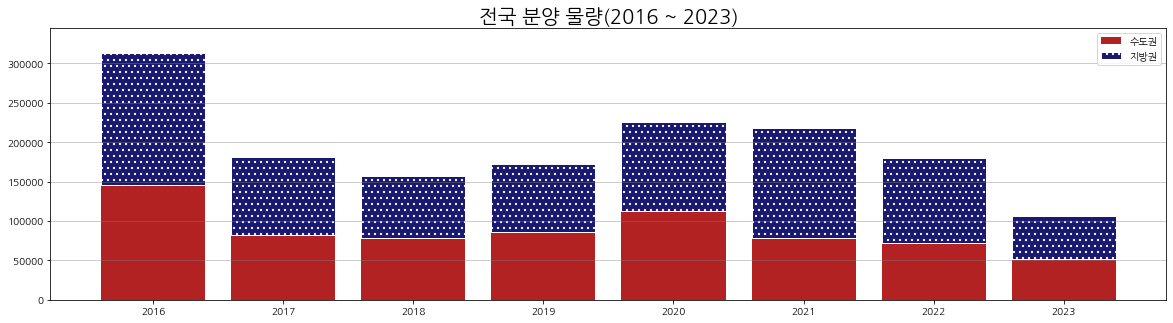

In [115]:
from matplotlib import pyplot as plt
import matplotlib.font_manager as fm
import numpy as np
import matplotlib.ticker as mticker

plt.figure(figsize=(20,5))

path = 'C:\\Windows\\Fonts\\NanumGothic.ttf'
font_name = fm.FontProperties(fname=path).get_name()
plt.rc('font', family=font_name)

down =  df_presale.iloc[:,0] #수도권
top =  df_presale.iloc[:,1] #지방권

plt.bar(df_presale.index, down, color='firebrick')#수도권
plt.bar(df_presale.index, top, bottom=down, color='midnightblue', hatch="..",edgecolor='white') #지방권

y = down + top
plt.ylim(0, y.max()*1.1)
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%i')) #%i 는 int , %f 는 float, %.3f : 0.001

plt.grid(True, axis='y', color='gray', alpha=0.5, linestyle='-')

plt.legend(['수도권', '지방권'])
plt.title('전국 분양 물량(2016 ~ 2023)', fontsize='20')
plt.show()

# 연습문제(Exercise) 2 - Just Do It Now !

### 분양 데이터를 시각화 함수 정의 해보세요

In [116]:
def presale_graph(df_presale):
    
    down =  df_presale.iloc[:,0] #수도권
    top =  df_presale.iloc[:,1] #지방권

    plt.bar(df_presale.index, down, color='firebrick')#수도권
    plt.bar(df_presale.index, top, bottom=down, color='midnightblue', hatch="..",edgecolor='white') #지방권

    y = down + top
    plt.ylim(0, y.max()*1.1)
    plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%i')) #%i 는 int , %f 는 float, %.3f : 0.001
    # gca() : get current axis 현재 Axes 객체를 반환

    plt.grid(True, axis='y', color='gray', alpha=0.5, linestyle='-')

    plt.legend(['수도권', '지방권'])
    plt.title('전국 분양 물량(2016 ~ 2023)', fontsize='20')
    plt.figure(figsize=(20,5))

    return plt.show()

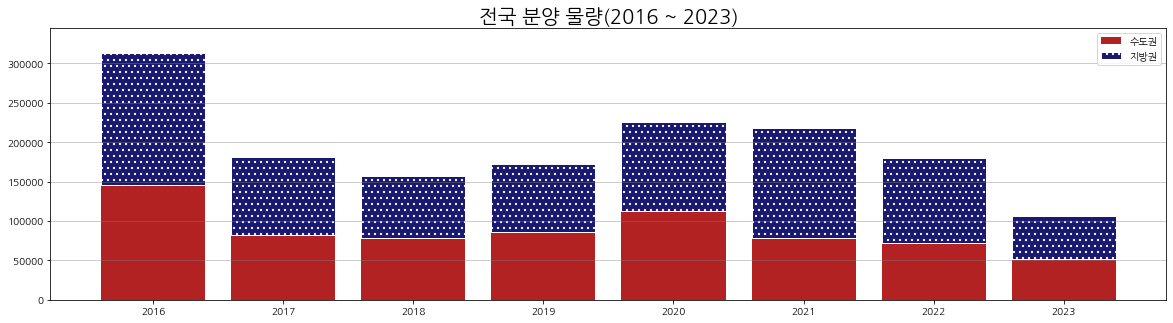

<Figure size 1440x360 with 0 Axes>

In [117]:
from matplotlib import pyplot as plt
import matplotlib.font_manager as fm
import numpy as np
import matplotlib.ticker as mticker

path = 'C:\\Windows\\Fonts\\NanumGothic.ttf'
font_name = fm.FontProperties(fname=path).get_name()
plt.rc('font', family=font_name)
plt.figure(figsize=(20,5))
##
presale_graph(df_presale)

# 일련의 프로세스로 정리

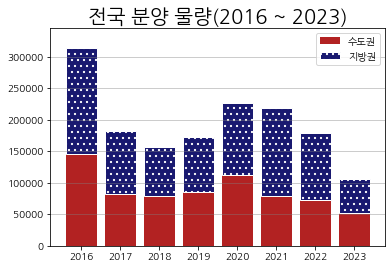

<Figure size 1440x360 with 0 Axes>

In [118]:
# 1. 파일경로 설정
url = 'https://kosis.kr/openapi/Param/statisticsParameterData.do?method=getList&apiKey
&itmId=T1+&objL1=00+04+11+20+&objL2=&objL3=&objL4=&objL5=&objL6=&objL7=&objL8=&format=json&jsonVD=Y&prdSe=M&startPrdDe=201510&endPrdDe=202312&orgId=414&tblId=DT_41401N_007'

#2. 데이터 전처리 함수
data = presale_preprocessing(url)

#3. 데이터 시각화 함수
presale_graph(data)

## 2.8 인허가, 분양 그래프 동시 시각화(데이터 분석 리포트 디자인)
### 2.8.1 subplot 
1행 2열에 나타내기

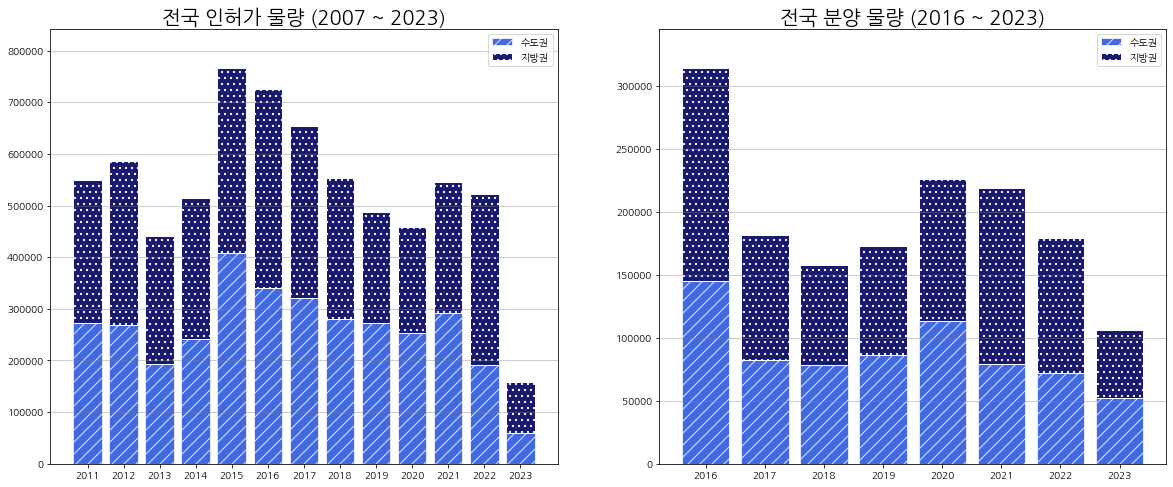

In [119]:
# 한글폰트 설정
path = 'C:\\Windows\\Fonts\\NanumGothic.ttf'
font_name = fm.FontProperties(fname=path).get_name()
plt.rc('font', family=font_name)
plt.figure(figsize=(20, 8))

# First Subplota
plt.subplot(1, 2, 1) #1행 2열. 중에 첫번째(1)
plt.title('전국 인허가 물량 (2007 ~ 2023)', fontsize='20')

down =  year_per.loc[:,'수도권_월']# 수도권
top =  year_per.loc[:,'지방권_월'] # 지방권

plt.bar(year_per.index, down, color='royalblue',hatch="//",edgecolor='lavender')#수도권
plt.bar(year_per.index, top, bottom=down, color='midnightblue', hatch="..",edgecolor='white') #지방권

y = down + top
plt.ylim(0, y.max()*1.1)

plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%i')) #%i 는 int , %f 는 float, %.3f 백만호 : 0.001 백만호
plt.grid(True, axis='y', color='gray', alpha=0.5, linestyle='-')
plt.xticks(year_per.index)

plt.legend(['수도권', '지방권'])
# plt.show()

# Second Subplot
plt.subplot(1, 2, 2)
# plt.figure(figsize=(8,8))
plt.title('전국 분양 물량 (2016 ~ 2023)', fontsize='20')

down =  df_presale.iloc[:,0]
top =  df_presale.iloc[:,1]

plt.bar(df_presale.index, down, color='royalblue',hatch="//",edgecolor='lavender')#수도권
plt.bar(df_presale.index, top, bottom=down, color='midnightblue', hatch="..",edgecolor='white') #지방권

y = down + top
plt.ylim(0, y.max()*1.1)

# 현재 축을 얻음 plt.gca(), 티커의 레이블링 포맷팅 함수 : set_major_formatter()
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%i')) #%i 는 int , %f 는 float, %.3f 백만호 : 0.001 백만호
plt.grid(True, axis='y', color='gray', alpha=0.5, linestyle='-')

plt.legend(['수도권', '지방권'])


# Display both subplots
plt.subplots_adjust(wspace=0.2)

plt.show()

# matplotlib css color 

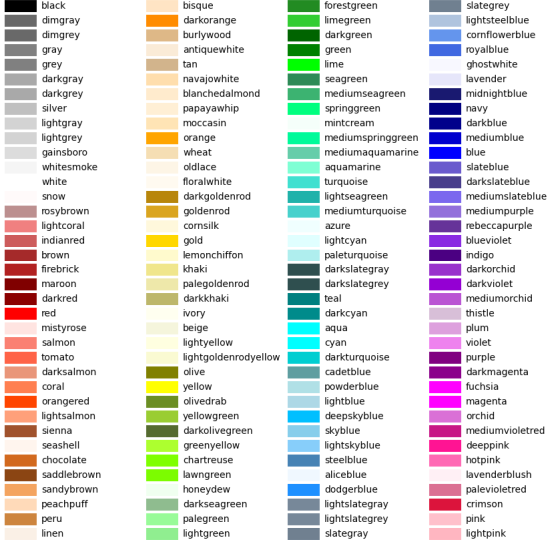

In [65]:
# 1. 코드블럭 안에 삽입하는 법 : Image("파일경로/파일명.확장자명")
# 2. ![이미지이름?](파일경로/파일명.확장자명)

from IPython.display import Image
Image("data/image.png")

# 인허가와 준공의 관계를 함께 표현

## 1. 준공 데이터 수집

In [66]:
from pandas import json_normalize
import pandas as pd
import requests

In [121]:
contents = requests.get(url)
test_data =contents.json()
df = pd.json_normalize(test_data)
df

,TBL_NM,ITM_NM_ENG,ITM_ID,ORG_ID,UNIT_NM_ENG,C1_OBJ_NM,C2_OBJ_NM,C3_OBJ_NM,C2,C1_NM_ENG,...,C1_OBJ_NM_ENG,C2_OBJ_NM_ENG,C3_OBJ_NM_ENG,C3,DT,PRD_SE,C1,C1_NM,C2_NM,C3_NM
0,주택건설 준공실적(월계),Housing use investigation,13103766972T1,116,Apartment Unit,구 분,부문명,시도별,13102766972B.0001,Total,...,Category,Category,City/Province,13102766972C.0001,24061,M,13102766972A.0001,총계,총계,전국
1,주택건설 준공실적(월계),Housing use investigation,13103766972T1,116,Apartment Unit,구 분,부문명,시도별,13102766972B.0001,Total,...,Category,Category,City/Province,13102766972C.0001,33428,M,13102766972A.0001,총계,총계,전국
2,주택건설 준공실적(월계),Housing use investigation,13103766972T1,116,Apartment Unit,구 분,부문명,시도별,13102766972B.0001,Total,...,Category,Category,City/Province,13102766972C.0001,18968,M,13102766972A.0001,총계,총계,전국
3,주택건설 준공실적(월계),Housing use investigation,13103766972T1,116,Apartment Unit,구 분,부문명,시도별,13102766972B.0001,Total,...,Category,Category,City/Province,13102766972C.0001,32676,M,13102766972A.0001,총계,총계,전국
4,주택건설 준공실적(월계),Housing use investigation,13103766972T1,116,Apartment Unit,구 분,부문명,시도별,13102766972B.0001,Total,...,Category,Category,City/Province,13102766972C.0001,24130,M,13102766972A.0001,총계,총계,전국
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,주택건설 준공실적(월계),Housing use investigation,13103766972T1,116,Apartment Unit,구 분,부문명,시도별,13102766972B.0001,Total,...,Category,Category,City/Province,13102766972C.0001,29393,M,13102766972A.0001,총계,총계,전국
157,주택건설 준공실적(월계),Housing use investigation,13103766972T1,116,Apartment Unit,구 분,부문명,시도별,13102766972B.0001,Total,...,Category,Category,City/Province,13102766972C.0001,20441,M,13102766972A.0001,총계,총계,전국
158,주택건설 준공실적(월계),Housing use investigation,13103766972T1,116,Apartment Unit,구 분,부문명,시도별,13102766972B.0001,Total,...,Category,Category,City/Province,13102766972C.0001,12358,M,13102766972A.0001,총계,총계,전국
159,주택건설 준공실적(월계),Housing use investigation,13103766972T1,116,Apartment Unit,구 분,부문명,시도별,13102766972B.0001,Total,...,Category,Category,City/Province,13102766972C.0001,19543,M,13102766972A.0001,총계,총계,전국


In [122]:
df = df[['PRD_DE', 'C1_NM', 'DT']]
# df = df.pivot("PRD_DE", "C1_NM", "DT")
df = df.pivot(index="PRD_DE", columns= "C1_NM", values="DT")

df = df.astype(int)
df

C1_NM,총계
PRD_DE,
201007,24061
201008,33428
201009,18968
201010,32676
201011,24130
...,...
202307,29393
202308,20441
202309,12358


In [123]:
df = df.rename(columns={"총계": "전국 준공(호)"})

In [124]:
df.index

Index(['201007', '201008', '201009', '201010', '201011', '201012', '201101',
       '201102', '201103', '201104',
       ...
       '202302', '202303', '202304', '202305', '202306', '202307', '202308',
       '202309', '202310', '202311'],
      dtype='object', name='PRD_DE', length=161)

In [125]:
df

C1_NM,전국 준공(호)
PRD_DE,
201007,24061
201008,33428
201009,18968
201010,32676
201011,24130
...,...
202307,29393
202308,20441
202309,12358


In [126]:
df['연'] = df.index.str[:4]
df['월'] = df.index.str[-2:]    
df['시점']= df['연'] + "-" + df['월']

df.index = df['시점']
df['시점'] = pd.to_datetime(df['시점'])    
df = df.groupby(['연']).sum(['총계'])

In [127]:
df.index

Index(['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020', '2021', '2022', '2023'],
      dtype='object', name='연')

In [128]:
df = df.drop(index='2010')

In [129]:
df_jungong = df

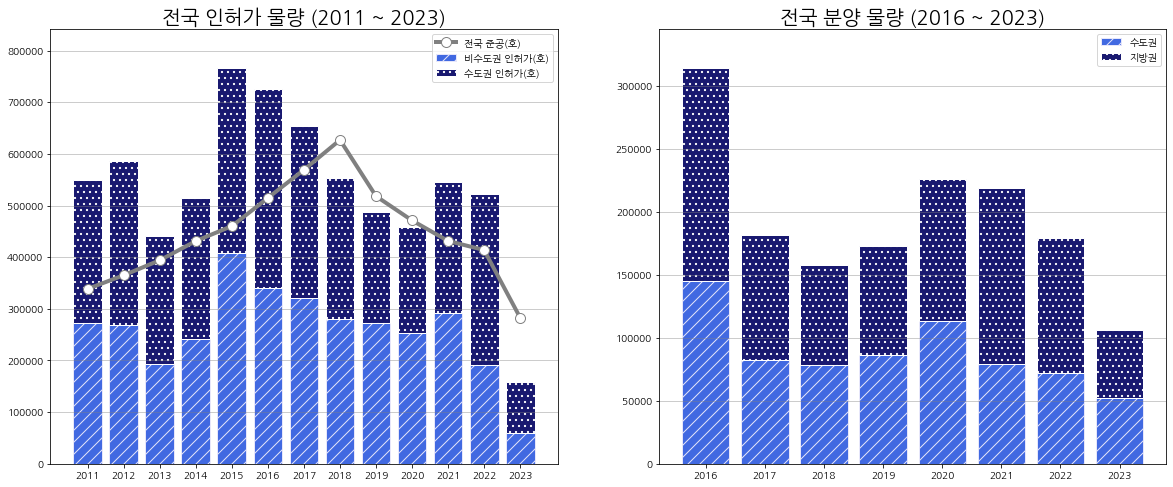

In [130]:
import matplotlib.ticker as mticker
# 한글폰트 설정
path = 'C:\\Windows\\Fonts\\NanumGothic.ttf'
font_name = fm.FontProperties(fname=path).get_name()
plt.rc('font', family=font_name)
plt.figure(figsize=(20, 8))

# First Subplota
plt.subplot(1, 2, 1) #1행 2열. 중에 첫번째(1)
plt.title('전국 인허가 물량 (2011 ~ 2023)', fontsize='20')

down =  year_per.loc[:,'수도권_월']# 수도권
top =  year_per.loc[:,'지방권_월'] # 지방권
y_전국준공물량 = df_jungong['전국 준공(호)'].to_numpy()

plt.bar(year_per.index, down, color='royalblue',hatch="//",edgecolor='lavender')#수도권
plt.bar(year_per.index, top, bottom=down, color='midnightblue', hatch="..",edgecolor='white') #지방권
plt.plot(year_per.index.to_numpy(), y_전국준공물량, color='gray', marker='o', markerfacecolor='w', linewidth=4, markersize=10, label='전국준공물량(좌, p)')

y = down + top
plt.ylim(0, y.max()*1.1)

plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%i')) #%i 는 int , %f 는 float, %.3f 백만호 : 0.001 백만호
plt.grid(True, axis='y', color='gray', alpha=0.5, linestyle='-')
plt.xticks(year_per.index)

plt.legend(['전국 준공(호)', '비수도권 인허가(호)', '수도권 인허가(호)'])
# plt.show()


# Second Subplot
plt.subplot(1, 2, 2)
# plt.figure(figsize=(8,8))
plt.title('전국 분양 물량 (2016 ~ 2023)', fontsize='20')

down =  df_presale.iloc[:,0]
top =  df_presale.iloc[:,1]

plt.bar(df_presale.index, down, color='royalblue',hatch="//",edgecolor='lavender')#수도권
plt.bar(df_presale.index, top, bottom=down, color='midnightblue', hatch="..",edgecolor='white') #지방권

y = down + top
plt.ylim(0, y.max()*1.1)

# 현재 축을 얻음 plt.gca(), 티커의 레이블링 포맷팅 함수 : set_major_formatter()
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%i')) #%i 는 int , %f 는 float, %.3f 백만호 : 0.001 백만호
plt.grid(True, axis='y', color='gray', alpha=0.5, linestyle='-')


plt.legend(['수도권', '지방권'])


# Display both subplots
plt.subplots_adjust(wspace=0.2)

plt.show()